In [2]:
import pandas as pd
import numpy as np
import datetime as dt

from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import matplotlib as plt
from sklearn.metrics import r2_score

In [3]:
df_ventas = pd.read_csv("D:/Escritorio/items_ordered_2years.csv", sep=",")

In [4]:
#df_ventas["created_at"] = pd.to_datetime(df_ventas["created_at"], format="%Y-%m-%d, %H:%M:%S")
#df_ventas["created_at"] = df_ventas["created_at"].dt.week

df_ventas["date"] = df_ventas["created_at"].apply(lambda x: x[0:10])

df_ventas["year"] = df_ventas["created_at"].apply(lambda x: x[0:4])

df_ventas["hour"] = df_ventas["created_at"].apply(lambda x: x[11:13])




In [5]:
df_ventas["week"] = df_ventas["date"]
df_ventas["date"] = pd.to_datetime(df_ventas["date"])
#Convert with datetime
df_ventas["week"] = df_ventas["week"].apply(lambda _: dt.datetime.strptime(_,"%Y-%m-%d"))

In [6]:
df_ventas["day"] = df_ventas["date"].apply(lambda x: pd.Timestamp(x).day_name())

df_ventas["day"] 

0          Tuesday
1          Tuesday
2          Tuesday
3           Monday
4         Thursday
            ...   
930955      Sunday
930956      Sunday
930957      Sunday
930958      Sunday
930959      Sunday
Name: day, Length: 930960, dtype: object

In [7]:
df_ventas["week"] = df_ventas["week"].dt.isocalendar().week


In [8]:
df_ventas

,num_order,item_id,created_at,product_id,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode,date,year,hour,week,day
0,ce30c2f02458457e3c7b563a636ae2a1,0916c05c5c3f65f59d813a78ac35c8d2,2018-11-06 16:52:13,86434,1.0,9.3750,15.38,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,2018-11-06,2018,16,45,Tuesday
1,ce30c2f02458457e3c7b563a636ae2a1,ff323b39ae36843396d2e53ce549fb10,2018-11-06 16:52:13,87652,1.0,7.0000,15.41,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,2018-11-06,2018,16,45,Tuesday
2,ce30c2f02458457e3c7b563a636ae2a1,199916dffc95259f4d2daab6664ca9c0,2018-11-06 16:52:13,2785,1.0,9.1587,12.23,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,2018-11-06,2018,16,45,Tuesday
3,83e75d608f11c8163599806420903ab9,8ca334ec2493501139327ce0165a1a84,2018-12-17 12:26:54,13000,5.0,13.7936,15.03,50.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,2018-12-17,2018,12,51,Monday
4,9b687270d8e7eed9717022af5961a190,ce0a1683c6b1a0248b330344ec592ddf,2017-01-12 14:19:03,41947,1.0,5.5924,7.00,5.0,1679091c5a880faf6fb5e6087eb1b2dc,Alboraya,46120,2017-01-12,2017,14,2,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930955,479ed436c26a511c4c3356e679bccbc9,37d700d54a6acc0ff49392cce34b6427,2018-12-30 23:51:57,1868,1.0,4.0700,4.79,10.0,d9cd4886b615a36059f72a74d7019113,Ubeda,23400,2018-12-30,2018,23,52,Sunday
930956,479ed436c26a511c4c3356e679bccbc9,05fd04261f1c951b07f2ac3a67254d81,2018-12-30 23:51:57,23539,1.0,4.0700,5.35,10.0,d9cd4886b615a36059f72a74d7019113,Ubeda,23400,2018-12-30,2018,23,52,Sunday
930957,bf923aa16e0608a5ed95347a9f411dce,8d8600ea4e451330f8614ba08ad4f047,2018-12-30 23:57:37,92793,1.0,33.7360,32.93,10.0,d73f27d3ab96df71f0fdc47511f326bc,Vic,08500,2018-12-30,2018,23,52,Sunday
930958,bf923aa16e0608a5ed95347a9f411dce,b74b2e1a096c656a247142e24eefb738,2018-12-30 23:57:37,93036,1.0,0.0000,16.32,10.0,d73f27d3ab96df71f0fdc47511f326bc,Vic,08500,2018-12-30,2018,23,52,Sunday


In [9]:
df_ventas["week"][df_ventas["year"] == "2018"] = df_ventas["week"][df_ventas["year"] == "2018"] + 52

In [10]:
df_ventas["week"][df_ventas["year"] == "2018"]

0          97
1          97
2          97
3         103
39         56
         ... 
930955    104
930956    104
930957    104
930958    104
930959    104
Name: week, Length: 615829, dtype: UInt32

In [11]:
len(df_ventas["week"].unique())

104

In [12]:
df_ventas["margin_total"] = (df_ventas["price"] - df_ventas["base_cost"]) * df_ventas["qty_ordered"]
df_ventas["price_total"] = df_ventas["price"] * df_ventas["qty_ordered"]

In [13]:
(df_ventas["discount_percent"][df_ventas["margin_total"] < -10]).count()

147

In [14]:
df_ventas.head(1)

,num_order,item_id,created_at,product_id,qty_ordered,base_cost,price,discount_percent,customer_id,city,zipcode,date,year,hour,week,day,margin_total,price_total
0,ce30c2f02458457e3c7b563a636ae2a1,0916c05c5c3f65f59d813a78ac35c8d2,2018-11-06 16:52:13,86434,1.0,9.375,15.38,8.0,eccbc87e4b5ce2fe28308fd9f2a7baf3,TARAZONA DE LA MANCHA,02100,2018-11-06,2018,16,97,Tuesday,6.005,15.38


In [22]:
df_ventas.to_excel('df_ventas.xlsx')

In [15]:
df_by_weeks = df_ventas.groupby("week").agg({"price_total" : "sum"})
df_by_weeks.to_csv('df_by_weeks.csv')
df_ventas.to_csv('df_ventas.csv')

In [74]:
df_by_weeks["margin_total"]

week
1        2983.3181
2       27144.7247
3       27524.5502
4        7610.8697
5        2686.9283
          ...     
100     14997.8325
101      2056.5827
102     91446.2920
103     69791.3662
104    114626.6857
Name: margin_total, Length: 104, dtype: float64

<AxesSubplot:xlabel='week'>

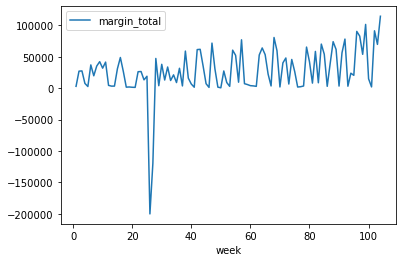

In [75]:
df_by_weeks.plot()

In [56]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df_by_weeks)

(0.01, False)

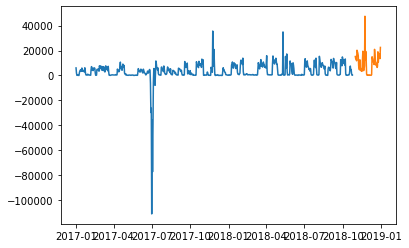

In [57]:
# Train and Test split

train = df_by_weeks[:661]
test = df_by_weeks[-61:]
plt.pyplot.plot(train)
plt.pyplot.plot(test)

In [58]:
arima_model = auto_arima(
    train, start_p = 0,
    start_q = 0, 
    max_p = 5,
    max_q = 5, 
    start_P = 0,
    start_Q = 0, 
    max_P = 5,
    max_Q = 5, 
    max_D=5,
    seasonal = True,
    error_action="warn",
    trace = True,
    suppress_warnings=True,
    stepwise=True,
    random_state=20,
    n_fits=50,
    )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13453.550, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13308.114, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13336.599, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13451.552, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13309.594, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13309.747, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13311.184, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13306.115, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13307.594, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13307.747, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13334.599, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13309.184, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.416 seconds


In [59]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  661
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -6651.057
Date:                Sat, 19 Mar 2022   AIC                          13306.115
Time:                        10:18:50   BIC                          13315.099
Sample:                             0   HQIC                         13309.597
                                - 661                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4471      0.008    -54.844      0.000      -0.463      -0.431
sigma2      3.321e+07   4.53e-12   7.33e+18      0.000    3.32e+07    3.32e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):            183928.58
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -2.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        84.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
arima_model.predict(n_periods = 19)

array([274.77746348, 272.07918574, 273.28568606, 272.7462149 ,
       272.98743252, 272.87957515, 272.92780219, 272.90623809,
       272.9158802 , 272.91156885, 272.91349661, 272.91263464,
       272.91302006, 272.91284772, 272.91292478, 272.91289033,
       272.91290573, 272.91289884, 272.91290192])

In [62]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 61), index = test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
fecha,
2018-10-31,274.777463
2018-11-01,272.079186
2018-11-02,273.285686
2018-11-03,272.746215
2018-11-04,272.987433
...,...
2018-12-26,272.912901
2018-12-27,272.912901
2018-12-28,272.912901


In [63]:
test["predicted_price"] = prediction
r2_score(test["margin_total"], test["predicted_price"])

<ipython-input-63-8cfe27087c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_price"] = prediction


-1.4024396415594116